In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Column Information

The following columns are in our datasets:

## `iem_dallas_player_rounds.csv`
- `col_name`: `type` - Description

## `iem_dallas_players`

## `iem_dallas_matches`

# Data Gathering Methodology

## On Data Cleaning

We did not perform data cleaning on our dataset in this notebook since we gathered our data from our own scripts and manual scraping.

However, our scripts performed the following data cleaning steps:


# EDA

For our EDA, we will be exploring the different key metrics for each team, each member, and each map.

In [2]:
iem_dallas_df = pd.read_csv("demos.csv")
iem_dallas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14280 entries, 0 to 14279
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   match_id                     14280 non-null  int64  
 1   map_id                       14280 non-null  int64  
 2   round_id                     14280 non-null  int64  
 3   team_name                    14280 non-null  object 
 4   map_name                     14280 non-null  object 
 5   round_number                 14280 non-null  int64  
 6   round_ct_team                14280 non-null  object 
 7   round_first_site_hit         8290 non-null   object 
 8   round_site_hit_time          8290 non-null   float64
 9   round_bomb_plant_site        7460 non-null   object 
 10  player_planted_bomb          14280 non-null  bool   
 11  round_bomb_plant_time        7460 non-null   float64
 12  round_bomb_defuser           14280 non-null  bool   
 13  bomb_defuse_time

### Teams - Exploratory Data Analysis
#### What are the key metrics for each team?

Total Matches

<Axes: title={'center': 'Matches Played by Team at IEM Dallas 2025'}, xlabel='team_name'>

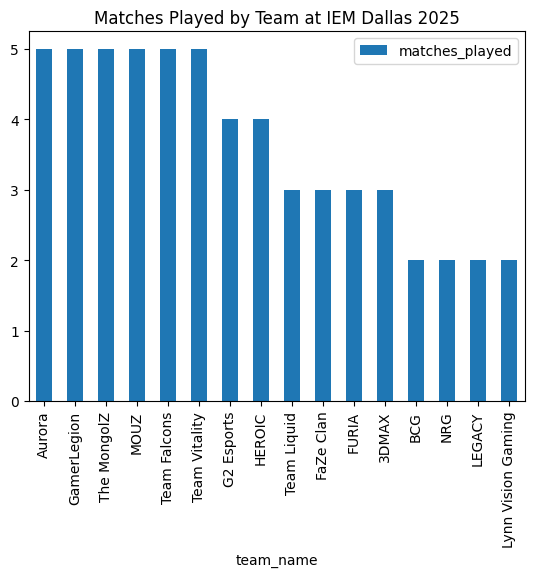

In [3]:
matches_per_team = iem_dallas_df.groupby('team_name')['match_id'].nunique().to_frame().reset_index()
matches_per_team.columns = ['team_name', 'matches_played']

matches_per_team = matches_per_team.sort_values(by='matches_played', ascending=False)

matches_per_team.plot.bar(x='team_name', y='matches_played', rot=90, title='Matches Played by Team at IEM Dallas 2025')



Total Rounds

<Axes: title={'center': 'Rounds Played by Each Team at IEM Dallas 2025'}, xlabel='team_name'>

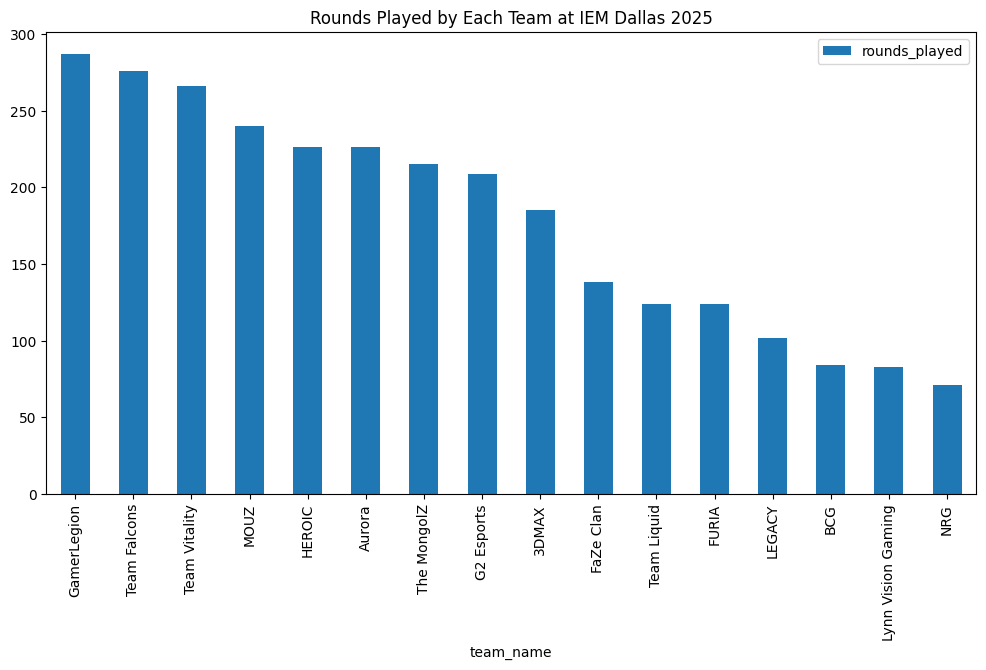

In [4]:
rounds_per_team = iem_dallas_df.groupby('team_name')['round_id'].nunique().to_frame().reset_index()
rounds_per_team.columns = ['team_name', 'rounds_played']
rounds_per_team = rounds_per_team.sort_values(by='rounds_played', ascending=False)

rounds_per_team.plot.bar(x='team_name', y='rounds_played', title='Rounds Played by Each Team at IEM Dallas 2025', figsize=(12, 6))

Round Winrate

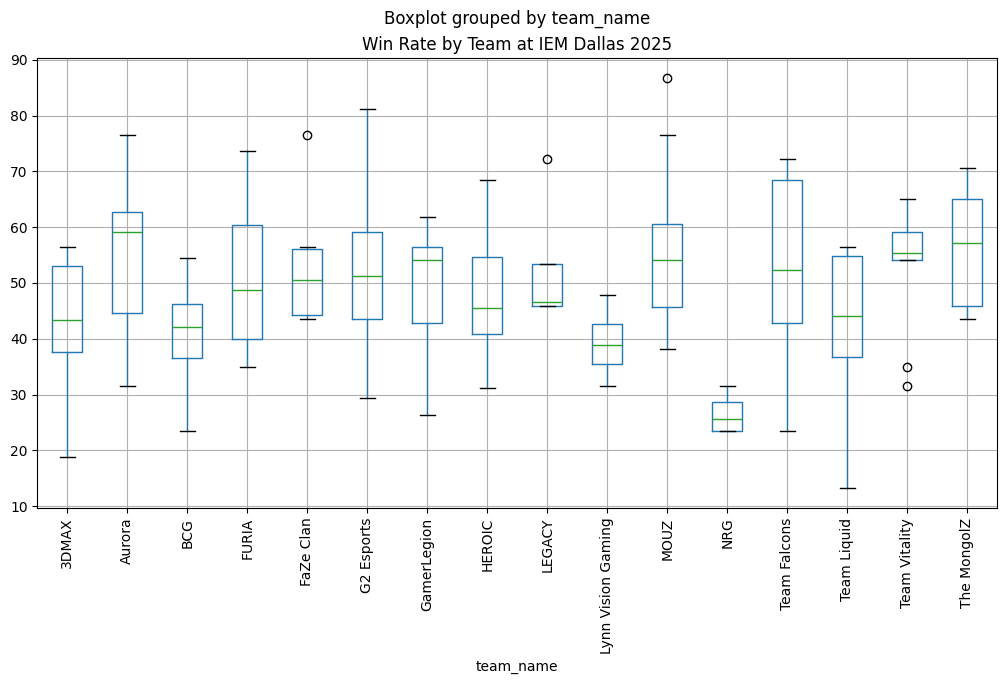

In [5]:
total_rounds_per_map_df = iem_dallas_df.groupby(['team_name', 'map_id'])['round_id'].nunique().to_frame().reset_index()
total_rounds_per_map_df.columns = ['team_name', 'map_id', 'total_rounds']

total_round_wins_df = iem_dallas_df.loc[((iem_dallas_df['team_name'] == iem_dallas_df['round_ct_team']) & (iem_dallas_df['round_result'] == 'CT')) | ((iem_dallas_df['team_name'] != iem_dallas_df['round_ct_team']) & (iem_dallas_df['round_result'] == 'T'))]
total_round_wins_per_map = total_round_wins_df.groupby(['team_name', 'map_id'])['round_id'].nunique().to_frame().reset_index()

total_round_wins_per_map.columns = ['team_name', 'map_id', 'round_wins']

winrate_df = pd.merge(total_rounds_per_map_df, total_round_wins_per_map, on = ['team_name', 'map_id'])
winrate_df['win_rate_percent'] = winrate_df['round_wins'] / winrate_df['total_rounds'] * 100

winrate_df.boxplot(column='win_rate_percent', by='team_name', figsize=(12, 6))
plt.pyplot.title('Win Rate by Team at IEM Dallas 2025')
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()

Average Kills per Round

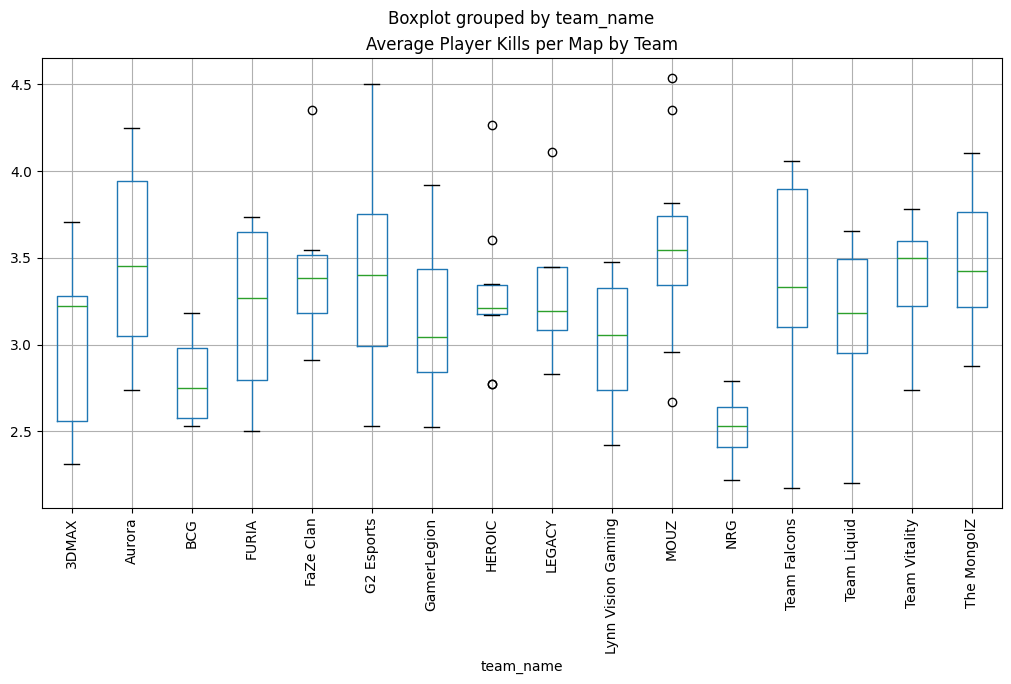

In [6]:
kills_per_map_per_team_df = iem_dallas_df.groupby(['team_name', 'map_id'])['player_kills'].sum().to_frame().reset_index()


ave_kills_per_map_per_team_df = pd.merge(kills_per_map_per_team_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_kills_per_map_per_team_df['average_player_kills_per_map'] = ave_kills_per_map_per_team_df['player_kills'] / ave_kills_per_map_per_team_df['total_rounds']


ave_kills_per_map_per_team_df.boxplot('average_player_kills_per_map', by='team_name', figsize=(12, 6))
plt.pyplot.title('Average Player Kills per Map by Team')
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()


Average Deaths per Round

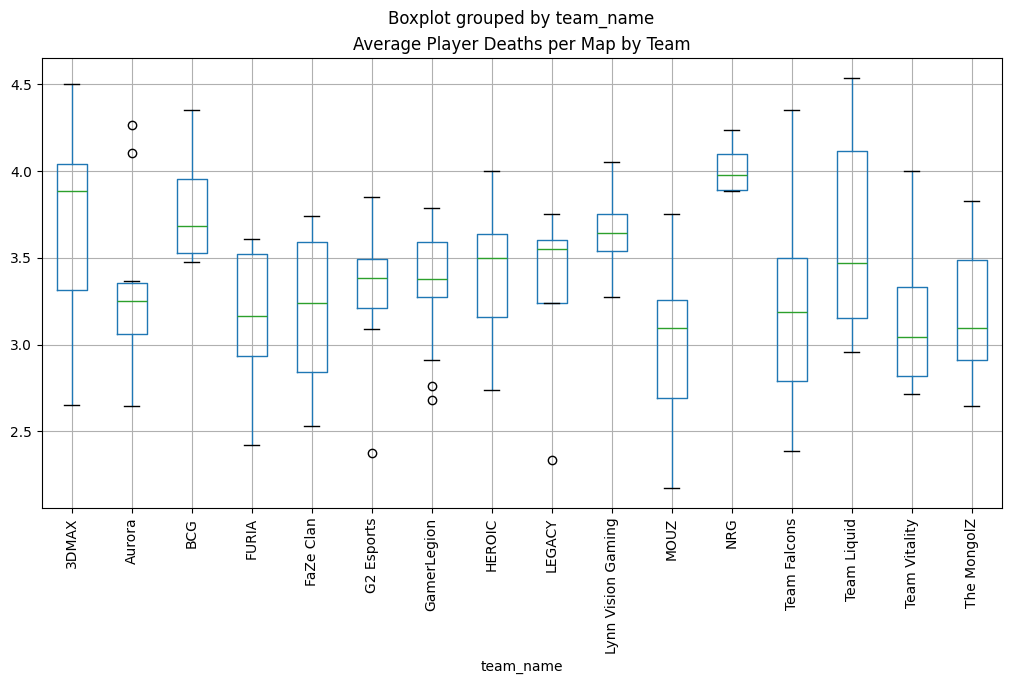

In [7]:
deaths_per_map_per_team_df = iem_dallas_df.loc[iem_dallas_df['player_died'] == True].groupby(['team_name', 'map_id'])['player_died'].count().to_frame()

average_deaths_per_map_per_team_df = pd.merge(deaths_per_map_per_team_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
average_deaths_per_map_per_team_df['average_player_deaths_per_map'] = average_deaths_per_map_per_team_df['player_died'] / average_deaths_per_map_per_team_df['total_rounds']

average_deaths_per_map_per_team_df.boxplot('average_player_deaths_per_map', by='team_name', figsize=(12, 6))
plt.pyplot.title('Average Player Deaths per Map by Team')
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()


Number of rounds as CT

Number of rounds as T

Average Flashes per Game

<Axes: title={'center': 'average_flashes_per_map'}, xlabel='team_name'>

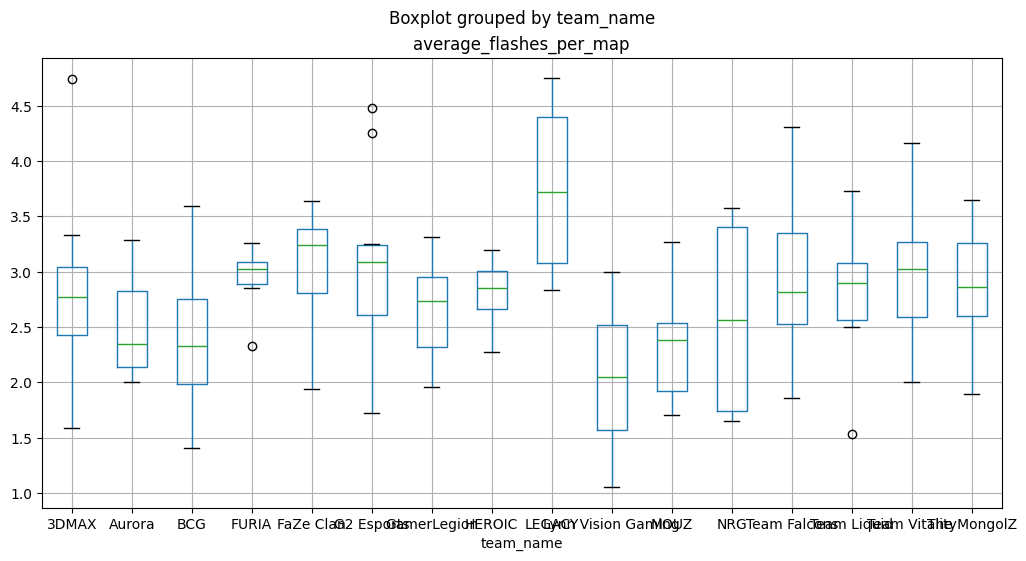

In [8]:
flashes_per_game_df = iem_dallas_df.groupby(['team_name', 'map_id'])['player_flashes_used'].sum()

ave_flashes_per_map_per_team_df = pd.merge(flashes_per_game_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_flashes_per_map_per_team_df['average_flashes_per_map'] = ave_flashes_per_map_per_team_df['player_flashes_used'] / ave_flashes_per_map_per_team_df['total_rounds']

ave_flashes_per_map_per_team_df.boxplot('average_flashes_per_map', by='team_name', figsize=(12, 6))



Average Smoke Grenades per Game

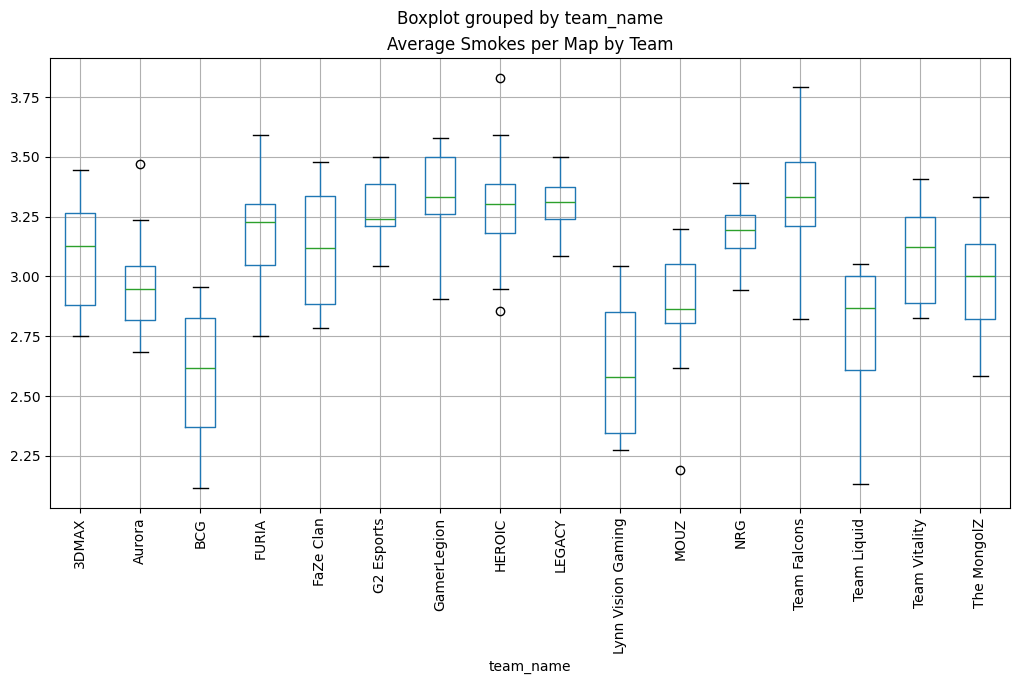

In [9]:
smokes_per_game_df = iem_dallas_df.groupby(['team_name', 'map_id'])['player_smokes_used'].sum()

ave_smokes_per_map_per_team_df = pd.merge(smokes_per_game_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_smokes_per_map_per_team_df['average_smokes_per_map'] = ave_smokes_per_map_per_team_df['player_smokes_used'] / ave_smokes_per_map_per_team_df['total_rounds']

ave_smokes_per_map_per_team_df.boxplot('average_smokes_per_map', by='team_name', figsize=(12, 6))
plt.pyplot.title('Average Smokes per Map by Team')
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()

Average Incendiaries per Game

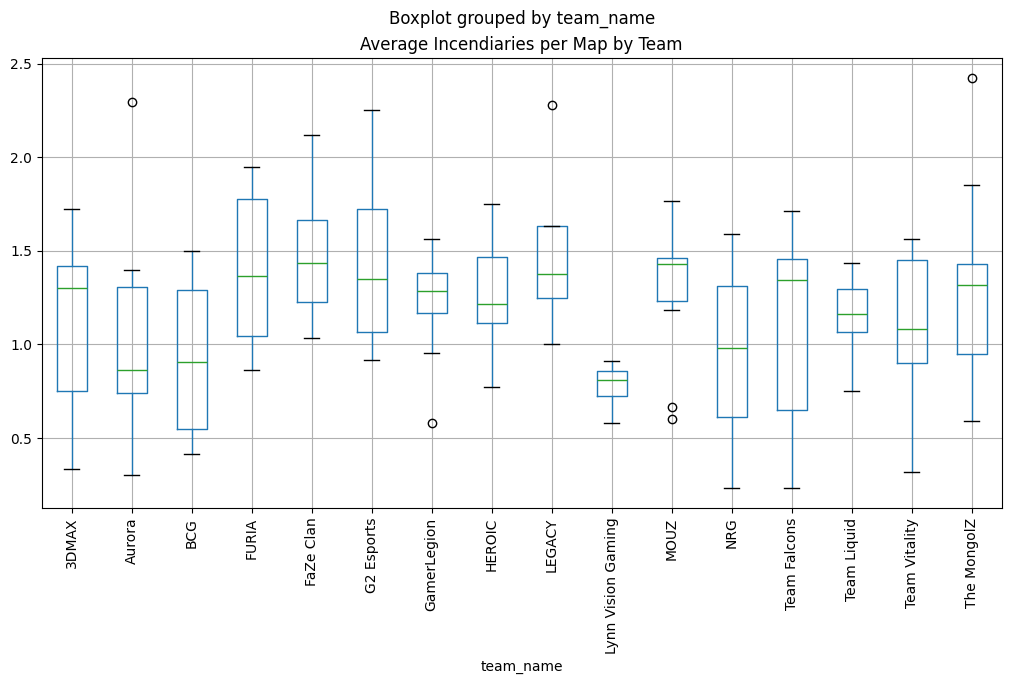

In [10]:
incendiaries_per_game_df = iem_dallas_df.groupby(['team_name', 'map_id'])['player_incendiaries_used'].sum()

ave_incendiaries_per_map_per_team_df = pd.merge(incendiaries_per_game_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_incendiaries_per_map_per_team_df['average_incendiaries_per_map'] = ave_incendiaries_per_map_per_team_df['player_incendiaries_used'] / ave_incendiaries_per_map_per_team_df['total_rounds']

ave_incendiaries_per_map_per_team_df.boxplot('average_incendiaries_per_map', by='team_name', figsize=(12, 6))
plt.pyplot.title('Average Incendiaries per Map by Team')
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()

Average Grenades per Game

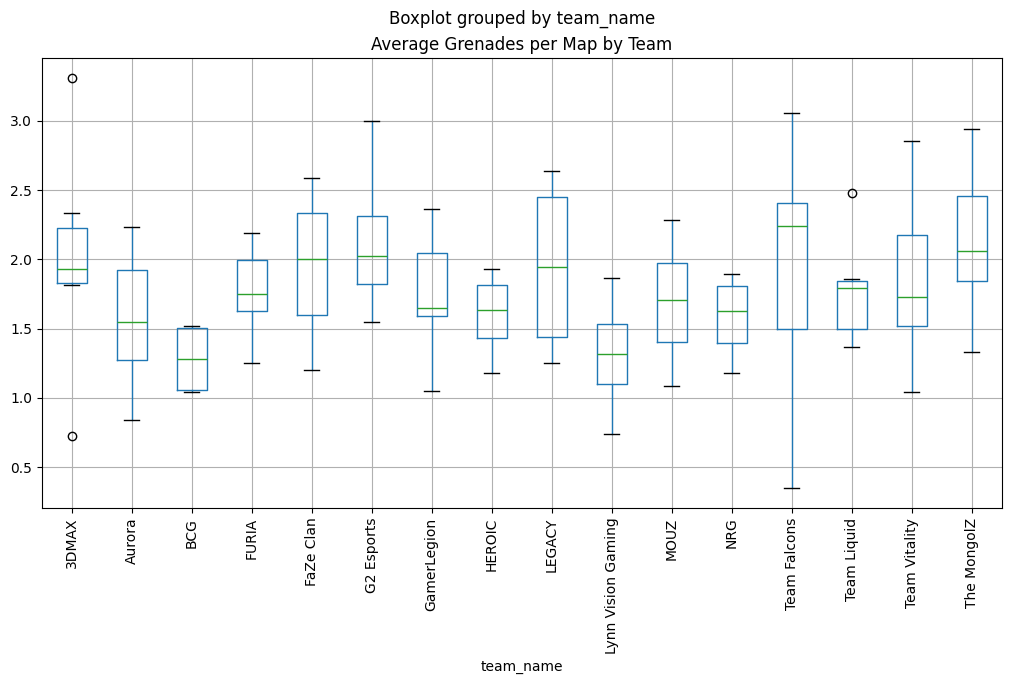

In [11]:
grenades_per_game_df = iem_dallas_df.groupby(['team_name', 'map_id'])['player_grenades_used'].sum()

ave_grenades_per_map_per_team_df = pd.merge(grenades_per_game_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_grenades_per_map_per_team_df['average_grenades_per_map'] = ave_grenades_per_map_per_team_df['player_grenades_used'] / ave_grenades_per_map_per_team_df['total_rounds']

ave_grenades_per_map_per_team_df.boxplot('average_grenades_per_map', by='team_name', figsize=(12, 6))
plt.pyplot.title('Average Grenades per Map by Team')
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()

Average Molotovs per Game

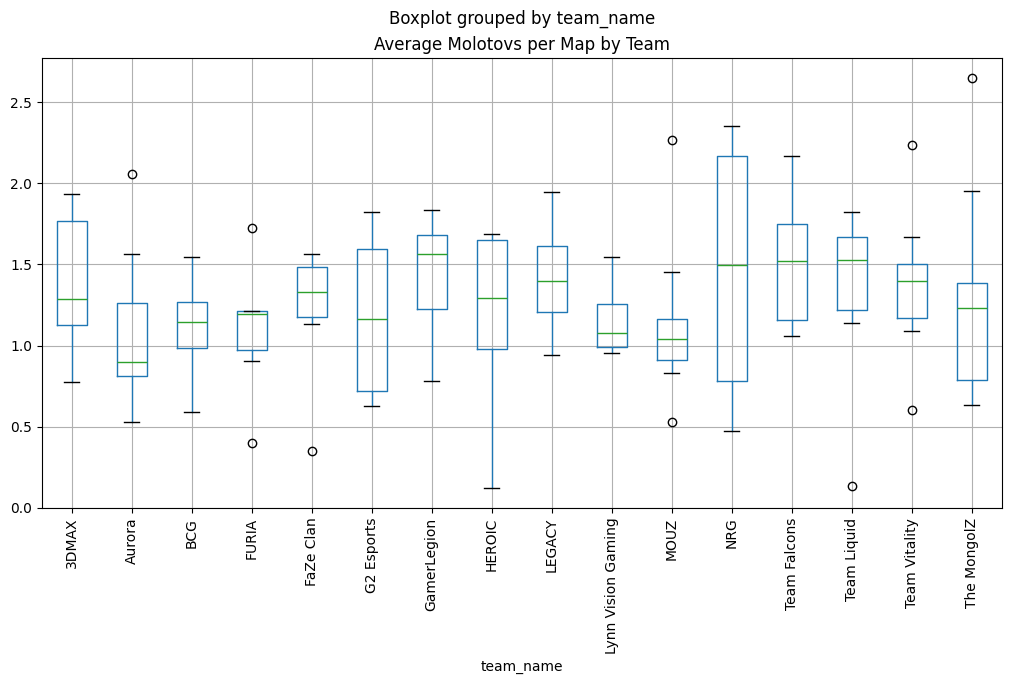

In [12]:
molotovs_per_game_df = iem_dallas_df.groupby(['team_name', 'map_id'])['player_molotovs_used'].sum()

ave_molotovs_per_map_per_team_df = pd.merge(molotovs_per_game_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_molotovs_per_map_per_team_df['average_molotovs_per_map'] = ave_molotovs_per_map_per_team_df['player_molotovs_used'] / ave_molotovs_per_map_per_team_df['total_rounds']

ave_molotovs_per_map_per_team_df.boxplot('average_molotovs_per_map', by='team_name', figsize=(12, 6))
plt.pyplot.title('Average Molotovs per Map by Team')
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()

# AI Disclaimer